<a href="https://colab.research.google.com/github/mlzzi/treinamento-rede-yolo/blob/main/modelo_detec%C3%A7%C3%A3o_de_p%C3%A1ssaros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Exibe as informações da GPU disponível

In [1]:
!nvidia-smi

Mon Jan 27 16:12:50 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Instala o pacote ultralytics, que contém o framework YOLO

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 913.6/913.6 kB 19.5 MB/s eta 0:00:00


## Importa o módulo YOLO e configurações de exibição

In [7]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode=checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
             ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/__init__.py", line 919, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.11/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are frozenset({'track', 'val', 'export', 'benchmark', 'predict', 'train'}).

    Arguments received: ['yolo', 'mode=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of frozenset({'classify', 'detect', 'segment', 'pose', 'obb'})
                MODE (required) is one of frozenset({'track', 'val', 'export', 'benchmark', 'predict', 'train'})
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' tha

## Verifica se o YOLO foi instalado corretamente e
## Conecta ao Roboflow usando a chave de API e baixa o dataset para treinar o modelo


In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="<SUA_API_AQUI>")
project = rf.workspace("<SEU_USUÁRIO>").project("DATASET DO SEU PROJETO DO ROBOFLOW")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...


## Treina o modelo YOLOv8 utilizando o dataset baixado

In [2]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=20 imgsz=640

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/Bird-Models-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

## Exibe o gráfico da matriz de confusão gerado durante o treinamento

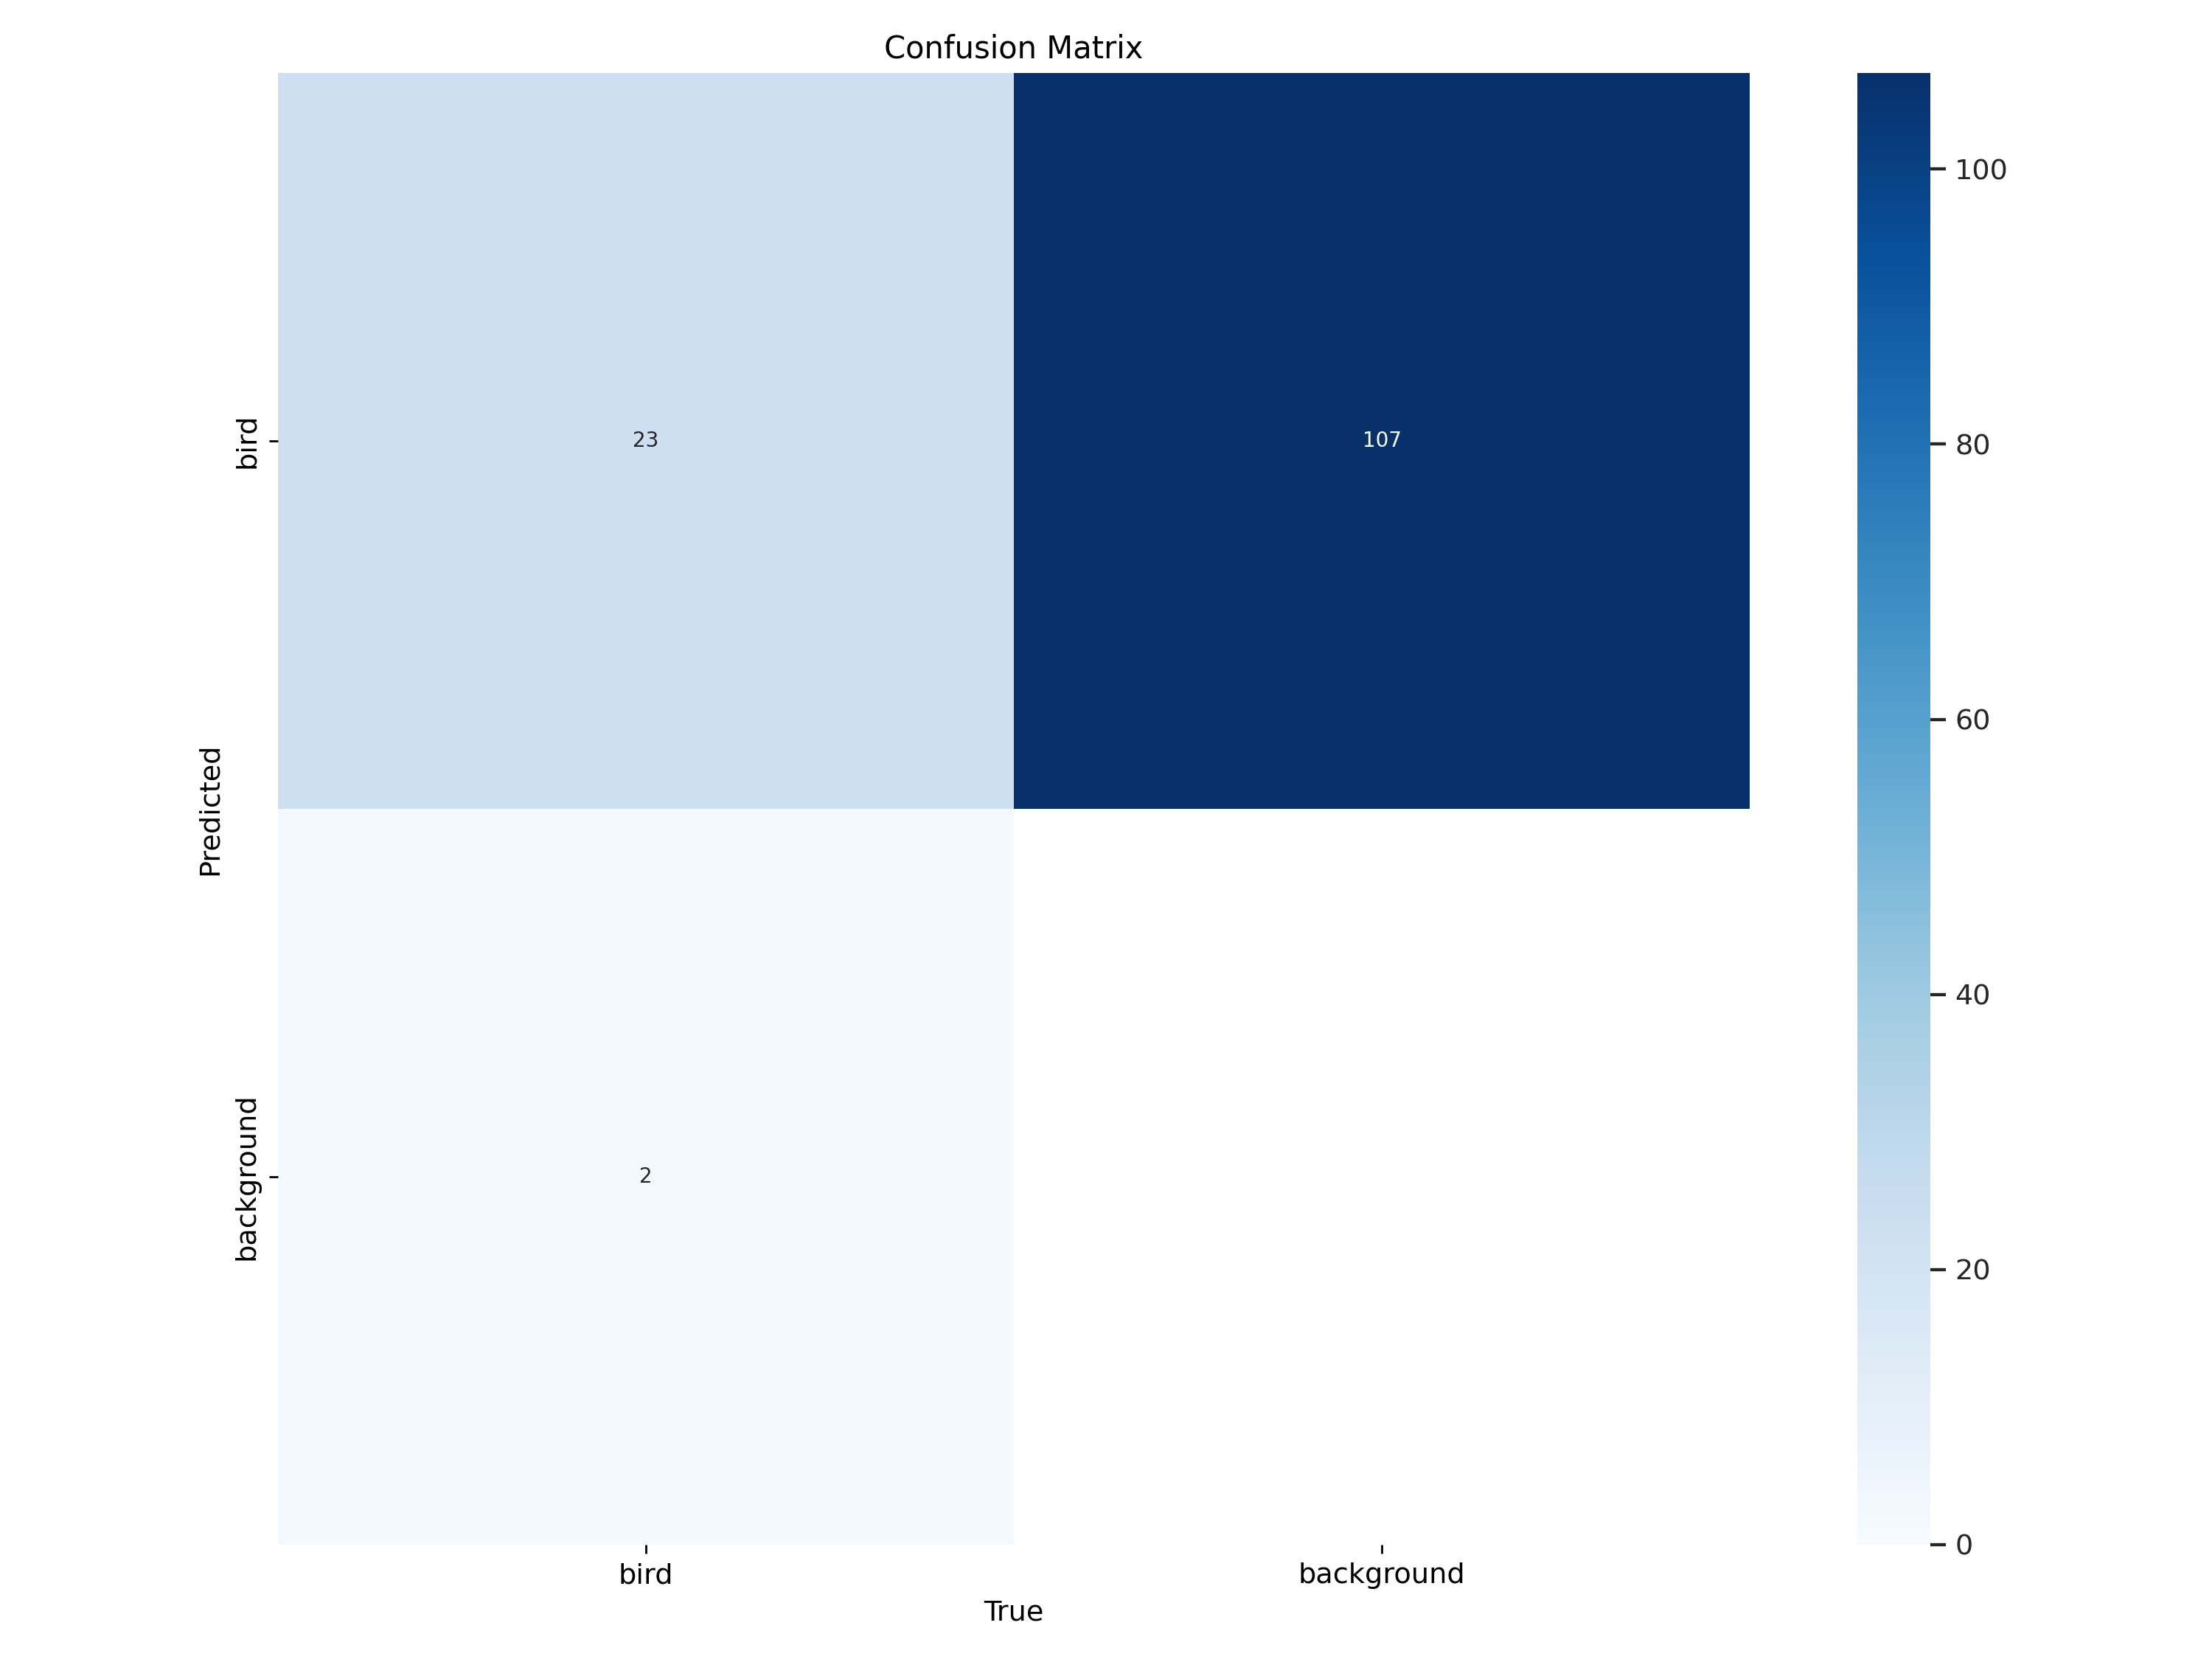

In [8]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width=600)

## Exibe os resultados do treinamento, como a curva de perda

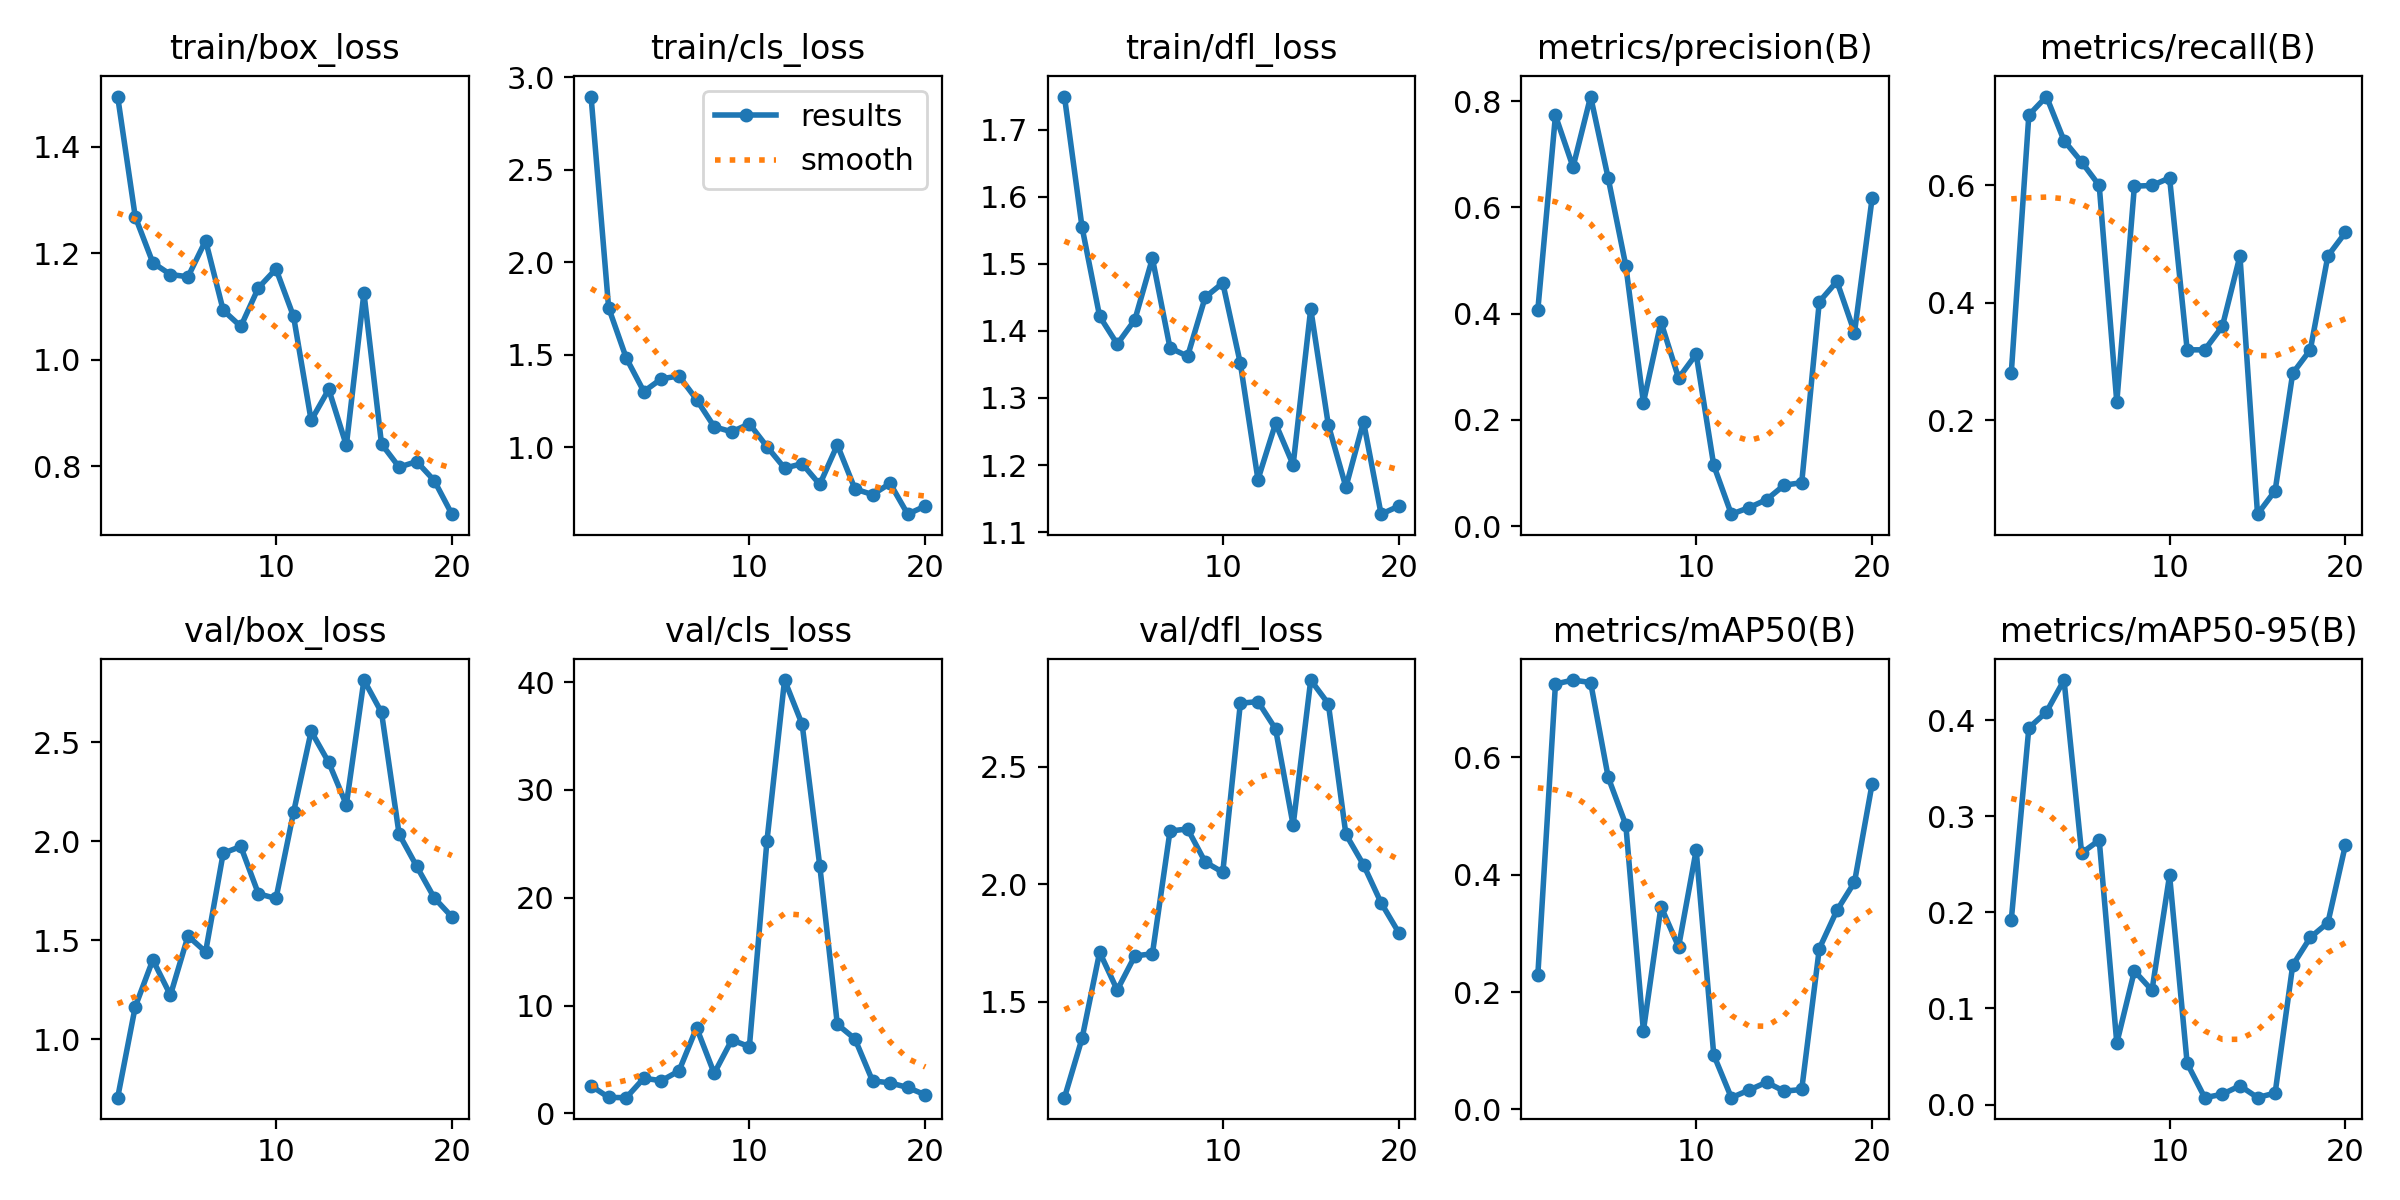

In [9]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

## Avalia o modelo treinado utilizando os dados de validação

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/Bird-Models-1/valid/labels.cache... 6 images, 0 backgrounds, 0 corrupt: 100% 6/6 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 1/1 [00:00<00:00,  1.07it/s]
                   all          6         25      0.809      0.677      0.725      0.456
Speed: 0.4ms preprocess, 42.5ms inference, 0.0ms loss, 89.2ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Faz previsões nos dados de teste e salva os resultados

In [11]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source={dataset.location}/test/images save=True

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/3 /content/Bird-Models-1/test/images/images-1-_jpeg.rf.ca71dcbba0acb15e2976338223c329d4.jpg: 640x640 5 birds, 37.1ms
image 2/3 /content/Bird-Models-1/test/images/images_jpeg.rf.b00188bf19ebbf03a96d8f9d4dc2bb2b.jpg: 640x640 2 birds, 37.0ms
image 3/3 /content/Bird-Models-1/test/images/three-birds-standing-on-a-branch-wallpaper-preview_jpg.rf.403a856bbce46676b6d59dc778de5548.jpg: 640x640 8 birds, 36.9ms
Speed: 2.3ms preprocess, 37.0ms inference, 199.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Exibe as imagens processadas do conjunto de teste

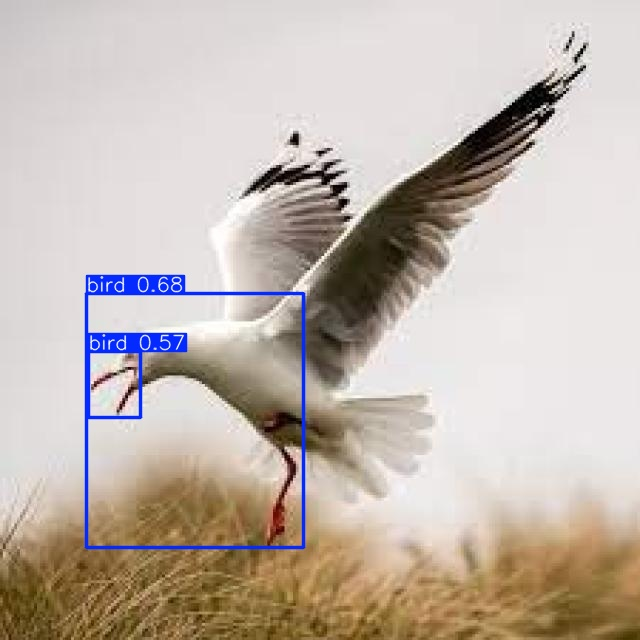

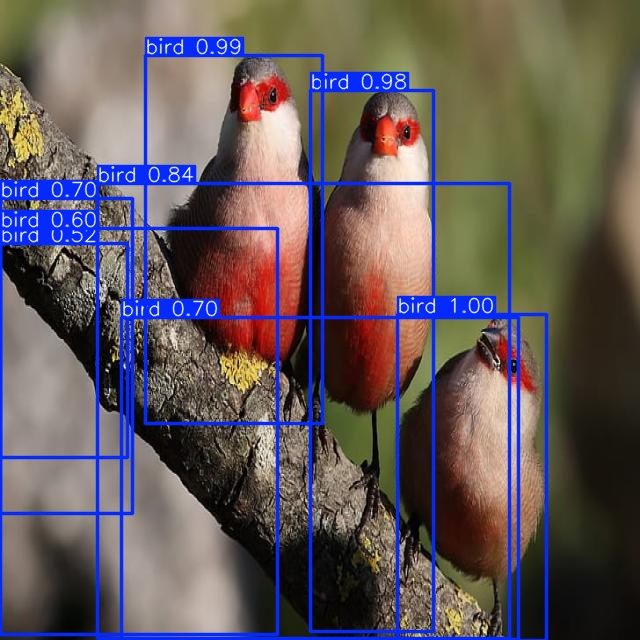

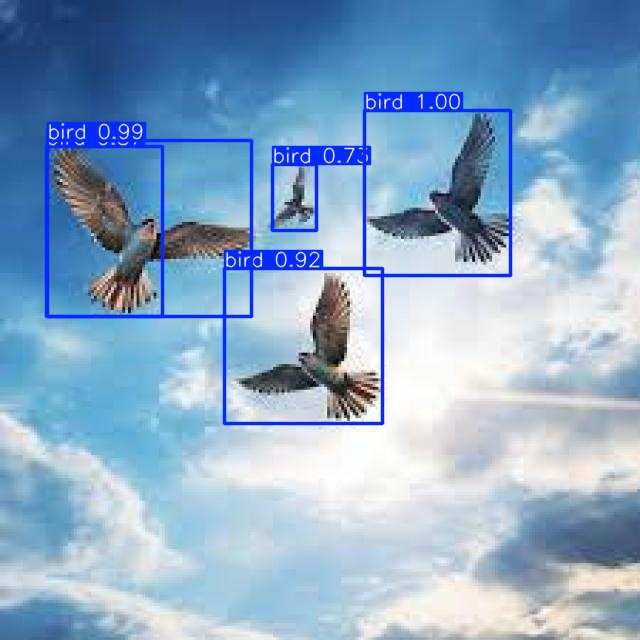

In [12]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('/content/runs/detect/predict/*.jpg'):
  display(Image(filename=image_path, width=600))
  print('\n')

## Testando o modelo com uma imagem de uma URL

In [13]:
import requests
from PIL import Image as PILImage

## Baixa uma imagem da web

In [14]:
url = "https://www.shutterstock.com/shutterstock/videos/1100431099/thumb/1.jpg?ip=x480"  # Substitua pela URL da imagem
response = requests.get(url, stream=True)
image_path = "./test_image.jpg"

Ultralytics 8.3.68 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,339 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/test_image.jpg: 352x640 2 birds, 63.4ms
Speed: 3.8ms preprocess, 63.4ms inference, 649.4ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


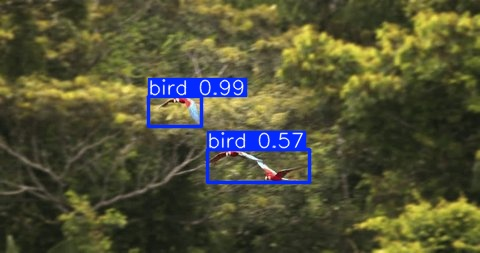

In [15]:
if response.status_code == 200:
    with open(image_path, "wb") as f:
        f.write(response.content)

    # Usa o modelo para fazer a previsão na imagem baixada
    !yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.5 source=/content/test_image.jpg save=True

    # Exibe o resultado
    result_image_path = "/content/runs/detect/predict2/test_image.jpg"
    display(Image(filename=result_image_path, width=600))
else:
    print("Erro ao baixar a imagem da URL. Verifique a URL fornecida.")